In [262]:
import numpy as np #for algebric calculations
import pandas as pd #essential for data reading,writing etc
import seaborn as sns #visualization library
import matplotlib.pyplot as plt #visualization library.

import warnings
warnings.filterwarnings('ignore')

In [263]:
import plotly.graph_objs as go
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [264]:
import sys
print('Python : {}'.format(sys.version[0:5]))
print('Numpy : {}'.format(np.__version__))
print('Pandas : {}'.format(pd.__version__))
print('Seaborn : {}'.format(sns.__version__))

Python : 3.9.1
Numpy : 1.21.5
Pandas : 1.4.2
Seaborn : 0.11.2


In [265]:
df = pd.read_csv(r'E:\Data Analysis\Naukari.com\Datasets/naukri_com-job_sample.csv')

In [266]:
df.head(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [267]:
#display number of rows and columns
nrow, ncolumn = df.shape
print('df has {} rows and {} columns.'.format(nrow,ncolumn))

df has 22000 rows and 14 columns.


In [268]:
#missing value
missing_value = df.isnull().sum()
percent_missing = missing_value*100/len(df)

In [269]:
percent_missing

company                 0.018182
education               9.072727
experience              0.018182
industry                0.022727
jobdescription          0.018182
jobid                   0.000000
joblocation_address     2.277273
jobtitle                0.000000
numberofpositions      79.709091
payrate                 0.440909
postdate                0.104545
site_name              81.877273
skills                  2.400000
uniq_id                 0.000000
dtype: float64

In [270]:
percent_missing.dtypes

dtype('float64')

In [271]:
missing_value.dtypes

dtype('int64')

In [272]:
missing_value = pd.concat([missing_value, percent_missing], axis =1)

In [273]:
missing_value.reset_index()

,index,0,1
0,company,4,0.018182
1,education,1996,9.072727
2,experience,4,0.018182
3,industry,5,0.022727
4,jobdescription,4,0.018182
5,jobid,0,0.000000
6,joblocation_address,501,2.277273
7,jobtitle,0,0.000000
8,numberofpositions,17536,79.709091
9,payrate,97,0.440909


In [274]:
missing_value.columns = ['missing value','percent missing']

In [275]:
missing_value.style.background_gradient(cmap ='summer_r')

,missing value,percent missing
company,4,0.018182
education,1996,9.072727
experience,4,0.018182
industry,5,0.022727
jobdescription,4,0.018182
jobid,0,0.000000
joblocation_address,501,2.277273
jobtitle,0,0.000000
numberofpositions,17536,79.709091
payrate,97,0.440909


<AxesSubplot:>

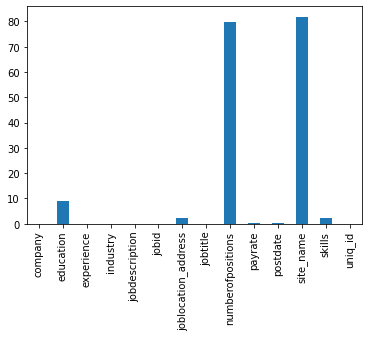

In [276]:
missing_value['percent missing'].plot(kind ='bar')

In [277]:
for i in df.columns:
    print('{} has {} unique values.'.format(i,df[i].nunique()))

company has 8469 unique values.
education has 2355 unique values.
experience has 147 unique values.
industry has 63 unique values.
jobdescription has 21063 unique values.
jobid has 21910 unique values.
joblocation_address has 2329 unique values.
jobtitle has 17564 unique values.
numberofpositions has 84 unique values.
payrate has 1848 unique values.
postdate has 4203 unique values.
site_name has 1 unique values.
skills has 45 unique values.
uniq_id has 22000 unique values.


In [278]:
unique = [[i, df[i].nunique(),df[i].unique()] for i in df.columns]

In [279]:
unique_df = pd.DataFrame(unique)

In [280]:
unique_df.set_index(0)

,1,2
0,,
company,8469,"[MM Media Pvt Ltd, find live infotech, Softtec..."
education,2355,[UG: B.Tech/B.E. - Any Specialization PG:Any P...
experience,147,"[0 - 1 yrs, 0 - 0 yrs, 4 - 8 yrs, 11 - 15 yrs,..."
industry,63,"[Media / Entertainment / Internet, Advertising..."
jobdescription,21063,[Job Description Send me Jobs like this Qual...
jobid,21910,"[210516002263, 210516002391, 101016900534, 810..."
joblocation_address,2329,"[Chennai, Bengaluru, Mumbai, Bengaluru, Kolkat..."
jobtitle,17564,"[Walkin Data Entry Operator (night Shift), Wor..."
numberofpositions,84,"[nan, 60.0, 4.0, 2.0, 20.0, 3.0, 1.0, 700.0, 8..."


In [281]:
unique_df.style.background_gradient(cmap = 'summer_r')

In [282]:
# clean payrate & split this feature into min_payrate & max_payrate


In [283]:
len_pay=[]
for pay in df['payrate']:
    len_pay.append(len(str(pay).split('-')))
    
    

In [284]:
pd.Series(len_pay).value_counts()

1    17028
2     4682
4      126
3       83
5       54
6       24
7        3
dtype: int64

In [285]:
payrate_split = df['payrate'].str.split(' ',expand =True)

In [286]:
payrate_split

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,"1,50,000",-,"2,25,000",P.A,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"1,50,000",-,"2,50,000",P.A.,20000,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Not,Disclosed,by,Recruiter,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Not,Disclosed,by,Recruiter,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Not,Disclosed,by,Recruiter,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Not,Disclosed,by,Recruiter,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
21996,"8,50,000",-,"14,00,000",P.A,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
21997,Not,Disclosed,by,Recruiter,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
21998,Not,Disclosed,by,Recruiter,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [287]:
payrate_split[0].str.strip()

0         1,50,000
1         1,50,000
2              Not
3              Not
4              Not
           ...    
21995          Not
21996     8,50,000
21997          Not
21998          Not
21999    12,00,000
Name: 0, Length: 22000, dtype: object

In [288]:
payrate_split[0] =payrate_split[0].str.replace(',','')

In [289]:
payrate_split[0] = payrate_split[0].str.replace(',', '')

In [290]:
payrate_split[0]

0         150000
1         150000
2            Not
3            Not
4            Not
          ...   
21995        Not
21996     850000
21997        Not
21998        Not
21999    1200000
Name: 0, Length: 22000, dtype: object

In [291]:
pay = []
for i in payrate_split[0]:
    try:
        if type(float(i))==np.float:
            pay.append(i)
    except:
        pay.append('missing value')
pay

['150000',
 '150000',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 '300000',
 'missing value',
 '100000',
 'missing value',
 'missing value',
 'missing value',
 '175000',
 'missing value',
 'missing value',
 'missing value',
 '100000',
 '100000',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 '150000',
 'missing value',
 'missing value',
 'missing value',
 '175000',
 '50000',
 '900000',
 'missing value',
 'missing value',
 '500000',
 'missing value',
 'missing value',
 '400000',
 'missing value',
 'missing value',
 'missing value',
 '200000',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 '400000',
 '250000',
 'missing value',
 '300000',
 'missing value',
 'missing value',
 'missing value',
 '50000',
 'missing va

In [292]:
#Alternative method
'''pd.to_numeric(payrate_split[0],errors='coerce')'''

'''any(map(str.isnumeric, payrate_split[0].astype(str)))
## any(map(str.isnumeric, payrate_split[0].astype(str)))

### Any: The any() function returns True if any item in an iterable is true, otherwise it returns False.

'''

'any(map(str.isnumeric, payrate_split[0].astype(str)))\n## any(map(str.isnumeric, payrate_split[0].astype(str)))\n\n### Any: The any() function returns True if any item in an iterable is true, otherwise it returns False.\n\n'

In [293]:
#similarly
payrate_split[2] = payrate_split[2].str.strip()
payrate_split[2] = payrate_split[2].str.replace(',','')
payrate_split[2] = payrate_split[2].str.replace(',', '')

In [294]:
payrate_split[2]

0         225000
1         250000
2             by
3             by
4             by
          ...   
21995         by
21996    1400000
21997         by
21998         by
21999    2200000
Name: 2, Length: 22000, dtype: object

In [295]:
pay_rate = []
for i in payrate_split[2]:
    try:
        if type(float(i))==np.float:
            pay_rate.append(i)
    except:
        pay_rate.append('missing value')

In [296]:
type(pay_rate)

list

In [297]:
pay = pd.to_numeric(pay, errors='coerce')
pay_rate = pd.to_numeric(pay_rate, errors='coerce')

In [298]:
pay = pd.DataFrame(pay)

In [299]:
pay_rate = pd.DataFrame(pay_rate)

In [300]:
pay

,0
0,150000.0
1,150000.0
2,NaN
3,NaN
4,NaN
...,...
21995,NaN
21996,850000.0
21997,NaN
21998,NaN


In [301]:
pay_rate

,0
0,225000.0
1,250000.0
2,NaN
3,NaN
4,NaN
...,...
21995,NaN
21996,1400000.0
21997,NaN
21998,NaN


In [302]:
pay_df = pd.concat([pay,pay_rate],axis =1, sort = False)

In [303]:
pay_df.columns = ['min pay', 'max pay']

In [304]:
pay_df

,min pay,max pay
0,150000.0,225000.0
1,150000.0,250000.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
21995,NaN,NaN
21996,850000.0,1400000.0
21997,NaN,NaN
21998,NaN,NaN


In [305]:
df = pd.concat([df,pay_df],axis =1, sort =False)

In [306]:
df

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min pay,max pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,9 - 13 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bengaluru,Quality Assurance - VP with Morgan Stanley Ban...,2.0,Not Disclosed by Recruiter,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - QA & Testing,ef40136e3b0c0abdab695d979a4b7153,NaN,NaN
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,3 - 5 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bengaluru, Gurgaon",Java Backend Developers for a Product Company,NaN,"8,50,000 - 14,00,000 P.A",2016-11-24 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,acb80b7bb109fa76d22d1f11c6e16c6a,850000.0,1400000.0
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,2 - 4 yrs,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bengaluru,Full Stack Development Engineer,NaN,Not Disclosed by Recruiter,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,f6f2885a6c87572616fb766029a0d284,NaN,NaN
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,7 - 12 yrs,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi NCR, Bengaluru",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,Not Disclosed by Recruiter,2016-11-27 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,c6f6538cb1007dd02c1b4b77909b3d38,NaN,NaN


In [307]:
df.drop('payrate',axis=1, inplace =True)

In [308]:
df

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,postdate,site_name,skills,uniq_id,min pay,max pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,9 - 13 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bengaluru,Quality Assurance - VP with Morgan Stanley Ban...,2.0,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - QA & Testing,ef40136e3b0c0abdab695d979a4b7153,NaN,NaN
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,3 - 5 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bengaluru, Gurgaon",Java Backend Developers for a Product Company,NaN,2016-11-24 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,acb80b7bb109fa76d22d1f11c6e16c6a,850000.0,1400000.0
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,2 - 4 yrs,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bengaluru,Full Stack Development Engineer,NaN,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,f6f2885a6c87572616fb766029a0d284,NaN,NaN
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,7 - 12 yrs,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi NCR, Bengaluru",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,2016-11-27 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,c6f6538cb1007dd02c1b4b77909b3d38,NaN,NaN


In [309]:
#cleaning of experience
df['experience'].unique()

array(['0 - 1 yrs', '0 - 0 yrs', '4 - 8 yrs', '11 - 15 yrs', '6 - 8 yrs',
       '2 - 5 yrs', '1 - 3 yrs', '2 - 7 yrs', '1 - 5 yrs', '2 - 4 yrs',
       '3 - 8 yrs', '5 - 7 yrs', '1 - 2 yrs', '5 - 10 yrs', '6 - 10 yrs',
       '10 - 12 yrs', '4 - 6 yrs', '1 - 6 yrs', '3 - 6 yrs', '3 - 7 yrs',
       '4 - 9 yrs', '3 - 5 yrs', '0 - 5 yrs', '5 - 8 yrs', '9 - 12 yrs',
       '7 - 12 yrs', '10 - 15 yrs', '4 - 7 yrs', '8 - 12 yrs',
       '10 - 16 yrs', '5 - 9 yrs', '0 - 4 yrs', '10 - 20 yrs',
       '10 - 18 yrs', '0 - 2 yrs', '7 - 10 yrs', '6 - 11 yrs',
       '2 - 3 yrs', '1 - 4 yrs', '7 - 9 yrs', '8 - 13 yrs', '2 - 6 yrs',
       '8 - 10 yrs', '0 - 3 yrs', '6 - 9 yrs', '15 - 20 yrs',
       '12 - 16 yrs', '1 - 1 yrs', '3 - 4 yrs', '17 - 20 yrs',
       '10 - 17 yrs', '9 - 14 yrs', '13 - 15 yrs', '17 - 23 yrs',
       '15 - 25 yrs', '14 - 22 yrs', '4 - 5 yrs', '7 - 11 yrs',
       '16 - 24 yrs', '14 - 18 yrs', '12 - 15 yrs', '7 - 8 yrs',
       '5 - 6 yrs', '12 - 19 yrs', '20 - 25 yrs', '

In [310]:
def split_exp(exp):
    try:
        if len(exp.split('-'))==2:
            min_exp = exp.split('-')[0].strip()
            max_exp = exp.split('-')[1].strip()
        return pd.Series([min_exp, max_exp])
    except:
        return pd.Series([np.nan,np.nan])
        

In [311]:
exp_df = df['experience'].apply(split_exp).rename(columns ={0:'min_exp',1:'max_exp'})

In [312]:
df = pd.concat([df,exp_df],axis =1)
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,postdate,site_name,skills,uniq_id,min pay,max pay,min_exp,max_exp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0,1 yrs
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0,0 yrs
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4,8 yrs
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11,15 yrs
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6,8 yrs


In [313]:
df.drop('experience', axis =1, inplace = True)

In [314]:
df.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'postdate',
       'site_name', 'skills', 'uniq_id', 'min pay', 'max pay', 'min_exp',
       'max_exp'],
      dtype='object')

In [315]:
df.head()

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,postdate,site_name,skills,uniq_id,min pay,max pay,min_exp,max_exp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0,1 yrs
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0,0 yrs
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4,8 yrs
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11,15 yrs
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6,8 yrs


In [317]:
df['max_exp'] = df['max_exp'].str.replace('yrs', '')

In [318]:
df

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,postdate,site_name,skills,uniq_id,min pay,max pay,min_exp,max_exp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0,1
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0,0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4,8
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11,15
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bengaluru,Quality Assurance - VP with Morgan Stanley Ban...,2.0,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - QA & Testing,ef40136e3b0c0abdab695d979a4b7153,NaN,NaN,9,13
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bengaluru, Gurgaon",Java Backend Developers for a Product Company,NaN,2016-11-24 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,acb80b7bb109fa76d22d1f11c6e16c6a,850000.0,1400000.0,3,5
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bengaluru,Full Stack Development Engineer,NaN,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,f6f2885a6c87572616fb766029a0d284,NaN,NaN,2,4
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi NCR, Bengaluru",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,2016-11-27 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,c6f6538cb1007dd02c1b4b77909b3d38,NaN,NaN,7,12


In [322]:
df.dtypes

company                 object
education               object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
postdate                object
site_name               object
skills                  object
uniq_id                 object
min pay                float64
max pay                float64
min_exp                 object
max_exp                 object
dtype: object

In [323]:
df['min_exp']=df['min_exp'].astype(float)
df['max_exp']=df['max_exp'].astype(float)

In [324]:
df.dtypes

company                 object
education               object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
postdate                object
site_name               object
skills                  object
uniq_id                 object
min pay                float64
max pay                float64
min_exp                float64
max_exp                float64
dtype: object

In [326]:
df['avg_payrate']=(df['min pay'] + df['max pay'])/2
df['avg_experience']=(df['min_exp'] + df['max_exp'])/2

In [327]:
df

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,postdate,site_name,skills,uniq_id,min pay,max pay,min_exp,max_exp,avg_payrate,avg_experience
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,187500.0,0.5
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,200000.0,0.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,NaN,6.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,NaN,13.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bengaluru,Quality Assurance - VP with Morgan Stanley Ban...,2.0,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - QA & Testing,ef40136e3b0c0abdab695d979a4b7153,NaN,NaN,9.0,13.0,NaN,11.0
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bengaluru, Gurgaon",Java Backend Developers for a Product Company,NaN,2016-11-24 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,acb80b7bb109fa76d22d1f11c6e16c6a,850000.0,1400000.0,3.0,5.0,1125000.0,4.0
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bengaluru,Full Stack Development Engineer,NaN,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,f6f2885a6c87572616fb766029a0d284,NaN,NaN,2.0,4.0,NaN,3.0
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi NCR, Bengaluru",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,2016-11-27 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,c6f6538cb1007dd02c1b4b77909b3d38,NaN,NaN,7.0,12.0,NaN,9.5


In [332]:
# cleaning of post date
df['postdate'] = pd.to_datetime(df['postdate'])
def fetch(df,feature):
    try:
        return pd.Series([df[feature].dt.day,df[feature].dt.month,df[feature].dt.year])
    except:
        print('Data type is not supported')

In [333]:
df['postdate'].unique()

<DatetimeArray>
['2016-05-21 19:30:00+00:00', '2016-10-13 16:20:55+00:00',
 '2016-10-13 16:20:56+00:00', '2016-10-13 16:20:57+00:00',
 '2016-10-10 16:20:57+00:00', '2016-10-09 16:20:57+00:00',
 '2016-10-12 16:20:57+00:00', '2016-10-11 16:20:57+00:00',
 '2016-10-12 16:20:58+00:00', '2016-10-10 16:20:58+00:00',
 ...
 '2016-11-27 22:47:03+00:00', '2017-01-08 22:47:04+00:00',
 '2016-11-25 22:47:04+00:00', '2016-11-27 22:47:04+00:00',
 '2016-11-26 22:47:04+00:00', '2016-11-24 22:47:04+00:00',
 '2016-11-25 22:47:05+00:00', '2016-12-29 22:47:05+00:00',
 '2016-11-24 22:47:05+00:00', '2016-11-27 22:47:05+00:00']
Length: 4204, dtype: datetime64[ns, UTC]

In [335]:
df[['day','month','year']]=fetch(df,'postdate')

In [336]:
df

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,postdate,site_name,...,uniq_id,min pay,max pay,min_exp,max_exp,avg_payrate,avg_experience,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,2016-05-21 19:30:00+00:00,NaN,...,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,187500.0,0.5,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,2016-05-21 19:30:00+00:00,NaN,...,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,200000.0,0.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,2016-10-13 16:20:55+00:00,NaN,...,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,NaN,6.0,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,2016-10-13 16:20:55+00:00,NaN,...,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,NaN,13.0,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,2016-10-13 16:20:55+00:00,NaN,...,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,NaN,7.0,13.0,10.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bengaluru,Quality Assurance - VP with Morgan Stanley Ban...,2.0,2016-11-25 22:47:05+00:00,www.naukri.com,...,ef40136e3b0c0abdab695d979a4b7153,NaN,NaN,9.0,13.0,NaN,11.0,25.0,11.0,2016.0
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bengaluru, Gurgaon",Java Backend Developers for a Product Company,NaN,2016-11-24 22:47:05+00:00,www.naukri.com,...,acb80b7bb109fa76d22d1f11c6e16c6a,850000.0,1400000.0,3.0,5.0,1125000.0,4.0,24.0,11.0,2016.0
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bengaluru,Full Stack Development Engineer,NaN,2016-11-25 22:47:05+00:00,www.naukri.com,...,f6f2885a6c87572616fb766029a0d284,NaN,NaN,2.0,4.0,NaN,3.0,25.0,11.0,2016.0
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi NCR, Bengaluru",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,2016-11-27 22:47:05+00:00,www.naukri.com,...,c6f6538cb1007dd02c1b4b77909b3d38,NaN,NaN,7.0,12.0,NaN,9.5,27.0,11.0,2016.0


In [337]:
df.drop('postdate', axis =1,inplace = True)

In [338]:
df

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,uniq_id,min pay,max pay,min_exp,max_exp,avg_payrate,avg_experience,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,187500.0,0.5,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,200000.0,0.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,NaN,6.0,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,NaN,13.0,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,NaN,7.0,13.0,10.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bengaluru,Quality Assurance - VP with Morgan Stanley Ban...,2.0,www.naukri.com,IT Software - QA & Testing,ef40136e3b0c0abdab695d979a4b7153,NaN,NaN,9.0,13.0,NaN,11.0,25.0,11.0,2016.0
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bengaluru, Gurgaon",Java Backend Developers for a Product Company,NaN,www.naukri.com,IT Software - Application Programming,acb80b7bb109fa76d22d1f11c6e16c6a,850000.0,1400000.0,3.0,5.0,1125000.0,4.0,24.0,11.0,2016.0
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bengaluru,Full Stack Development Engineer,NaN,www.naukri.com,IT Software - Application Programming,f6f2885a6c87572616fb766029a0d284,NaN,NaN,2.0,4.0,NaN,3.0,25.0,11.0,2016.0
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi NCR, Bengaluru",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,www.naukri.com,IT Software - Application Programming,c6f6538cb1007dd02c1b4b77909b3d38,NaN,NaN,7.0,12.0,NaN,9.5,27.0,11.0,2016.0


In [359]:
#clean job location
df['joblocation_address'].value_counts().head(10)

Bengaluru/Bangalore         3775
Mumbai                      2348
Bengaluru                   1453
Hyderabad / Secunderabad    1246
Chennai                     1204
Hyderabad                    936
Noida                        775
Delhi                        763
Gurgaon                      743
Mumbai , Mumbai              514
Name: joblocation_address, dtype: int64

In [360]:
data = df.copy()

In [361]:
data['joblocation_address'].unique()

array(['Chennai', 'Bengaluru',
       'Mumbai, Bengaluru, Kolkata, Chennai, Coimbatore, Tamilnadu', ...,
       'Mumbai, Bengaluru, Hyderabad, Kolkata',
       'Mumbai, Chennai, Delhi, Bengaluru, Hyderabad, Pune',
       'Bengaluru, Malaysia'], dtype=object)

In [362]:
pd.Series(data['joblocation_address'].unique())

0                                                 Chennai
1                                               Bengaluru
2       Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...
3       Delhi NCR, Mumbai, Bengaluru, Kochi, Greater N...
4                                Mumbai, Delhi, Bengaluru
                              ...                        
2325                           Mumbai, Bengaluru, Kolkata
2326                  Bengaluru, Pune, Chennai, Delhi NCR
2327                Mumbai, Bengaluru, Hyderabad, Kolkata
2328    Mumbai, Chennai, Delhi, Bengaluru, Hyderabad, ...
2329                                  Bengaluru, Malaysia
Length: 2330, dtype: object

In [364]:
rep = pd.read_csv(r'E:\Data Analysis\Naukari.com\Datasets/replacements.csv').set_index('Unnamed: 0')

In [365]:
rep.head()

,joblocation_address
Unnamed: 0,
Delhi/NCR(National Capital Region),Delhi
Delhi/NCR(National Capital Region),Delhi
(Bengaluru/Bangalore),Bangalore
Bangalore,Bangalore
"Bangalore , Bangalore / Bangalore",Bangalore


In [366]:
rep_dict = rep.to_dict()

In [367]:
rep_dict

{'joblocation_address': {' Delhi/NCR(National Capital Region)': 'Delhi',
  ' Delhi/NCR(National Capital Region) ': 'Delhi',
  '(Bengaluru/Bangalore)': 'Bangalore',
  'Bangalore': 'Bangalore',
  'Bangalore , Bangalore / Bangalore': 'Bangalore',
  'Bangalore Bangalore': 'Bangalore',
  'Bangalore,Bangalore / Bangalore': 'Bangalore',
  'Bangalore,karnataka': 'Bangalore',
  'Bengaluru': 'Bangalore',
  'Bengaluru/Bangalore ': 'Bangalore',
  'Bengaluru/Bangalore , bangalore': 'Bangalore',
  'DELHI(NATIONAL CAPITAL REGION)': 'Delhi',
  'Delhi': 'Delhi',
  'Delhi , Delhi': 'Delhi',
  'Delhi , Delhi/Greater Delhi': 'Delhi',
  'Delhi , Delhi/NCR(National Capital Region)': 'Delhi',
  'Delhi NCR': 'Delhi',
  'Delhi(National Capital Region)': 'Delhi',
  'Delhi(National Capital Region) , Delhi': 'Delhi',
  'Delhi,Delhi': 'Delhi',
  'Delhi/NCR': 'Delhi',
  'Delhi/NCR(National Capital Region)': 'Delhi',
  'Delhi/NCR(National Capital Region) ': 'Delhi',
  'Delhi/NCR(National Capital Region) , Delhi': 'D

In [368]:
data.replace(rep_dict,inplace =True,regex =True)

In [369]:
data['joblocation_address'].value_counts()

Bangalore                                                                                           5228
Mumbai                                                                                              2887
Delhi                                                                                               2741
Hyderabad                                                                                           2182
Chennai                                                                                             1204
                                                                                                    ... 
Delhi , Delhi , Faridabad                                                                              1
Bangalore , Delhi(National Capital Region) , Delhi , Ahmedabad , Delhi                                 1
Ernakulam / Kochi/ Cochin , Trivandrum , Jaipur , Delhi , Delhi(National Capital Region) , Delhi       1
Mathura , Delhi , Delhi                                

In [371]:
data

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,uniq_id,min pay,max pay,min_exp,max_exp,avg_payrate,avg_experience,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,187500.0,0.5,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,200000.0,0.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,NaN,6.0,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,NaN,13.0,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bangalore,JAVA Technical Lead (6-8 yrs) -,4.0,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,NaN,7.0,13.0,10.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bangalore,Quality Assurance - VP with Morgan Stanley Ban...,2.0,www.naukri.com,IT Software - QA & Testing,ef40136e3b0c0abdab695d979a4b7153,NaN,NaN,9.0,13.0,NaN,11.0,25.0,11.0,2016.0
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bangalore, Delhi",Java Backend Developers for a Product Company,NaN,www.naukri.com,IT Software - Application Programming,acb80b7bb109fa76d22d1f11c6e16c6a,850000.0,1400000.0,3.0,5.0,1125000.0,4.0,24.0,11.0,2016.0
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bangalore,Full Stack Development Engineer,NaN,www.naukri.com,IT Software - Application Programming,f6f2885a6c87572616fb766029a0d284,NaN,NaN,2.0,4.0,NaN,3.0,25.0,11.0,2016.0
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi, Bangalore",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,www.naukri.com,IT Software - Application Programming,c6f6538cb1007dd02c1b4b77909b3d38,NaN,NaN,7.0,12.0,NaN,9.5,27.0,11.0,2016.0


In [373]:
data.drop('uniq_id', axis =1, inplace =True)

In [ ]:
data.to_csv(r'')